In [9]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
#import matplotlib.pyplot as plt 
#plt.rc("font", size=14) #dictionary objects

import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

1. Import Data & Python Packages

In [10]:
# Read CSV data file into DataFrame
df = pd.read_csv("data_source\log2.csv")

# preview data
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [12]:
df.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


2. Exploratory Data Analysis

2.1 Exploratory of Action

In [13]:
# target distribution
print('Absolute Frequencies:')
print(df.Action.value_counts())
print()

print('Percentages:')
print(df.Action.value_counts(normalize=True))

Absolute Frequencies:
allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64

Percentages:
allow         0.574376
deny          0.228697
drop          0.196103
reset-both    0.000824
Name: Action, dtype: float64


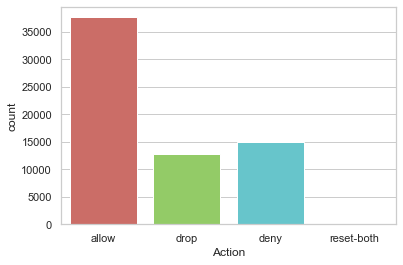

In [14]:
sns.countplot(x='Action',data=df,palette='hls')
plt.show()

2.2 Exploratory of Packets&Elapsed Time

[Text(0.5, 1.0, 'reset-both')]

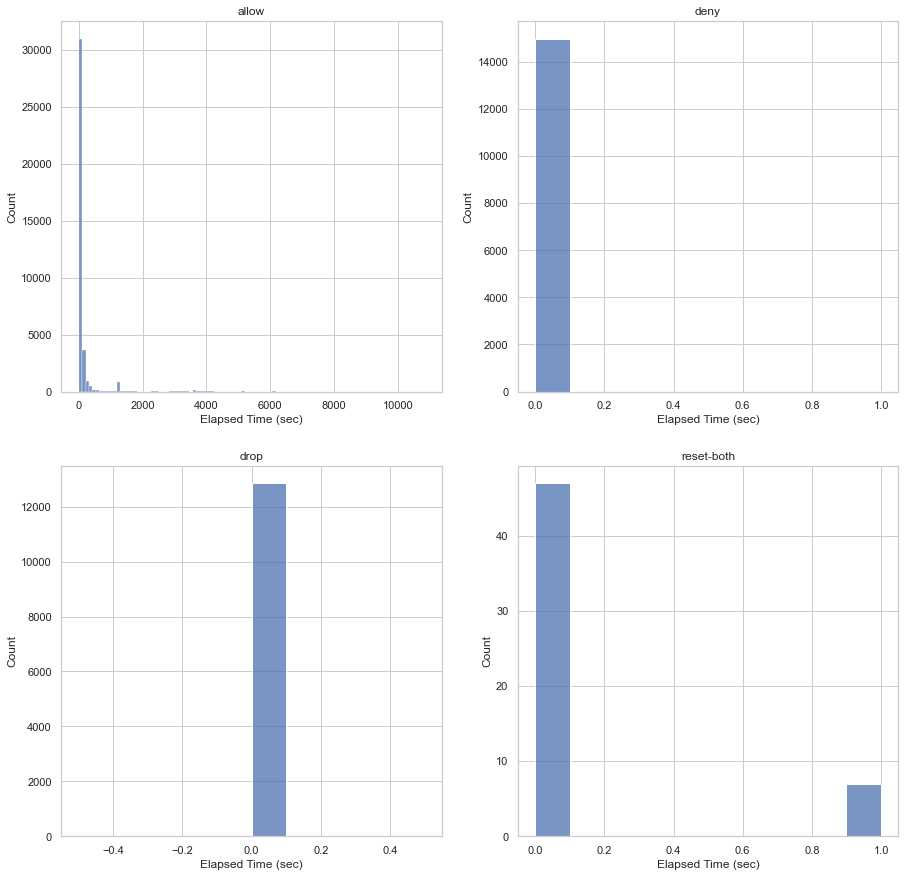

In [15]:
#Setup subplot
fig, ((axes1,axes2),(axes3,axes4)) = plt.subplots(2, 2, figsize=(15, 15))

sns.histplot(data=df.loc[df['Action']=='allow',(['Action','Elapsed Time (sec)'])], 
             x='Elapsed Time (sec)',
             bins=100, 
             ax=axes1).set(title='allow')

sns.histplot(data=df.loc[df['Action']=='deny',(['Action','Elapsed Time (sec)'])], 
             x='Elapsed Time (sec)',
             bins=10, 
             ax=axes2).set(title='deny')

sns.histplot(data=df.loc[df['Action']=='drop',(['Action','Elapsed Time (sec)'])], 
             x='Elapsed Time (sec)',
             bins=10, 
             ax=axes3).set(title='drop')

sns.histplot(data=df.loc[df['Action']=='reset-both',(['Action','Elapsed Time (sec)'])], 
             x='Elapsed Time (sec)',
             bins=10, 
             ax=axes4).set(title='reset-both')

[Text(0.5, 1.0, 'reset-both')]

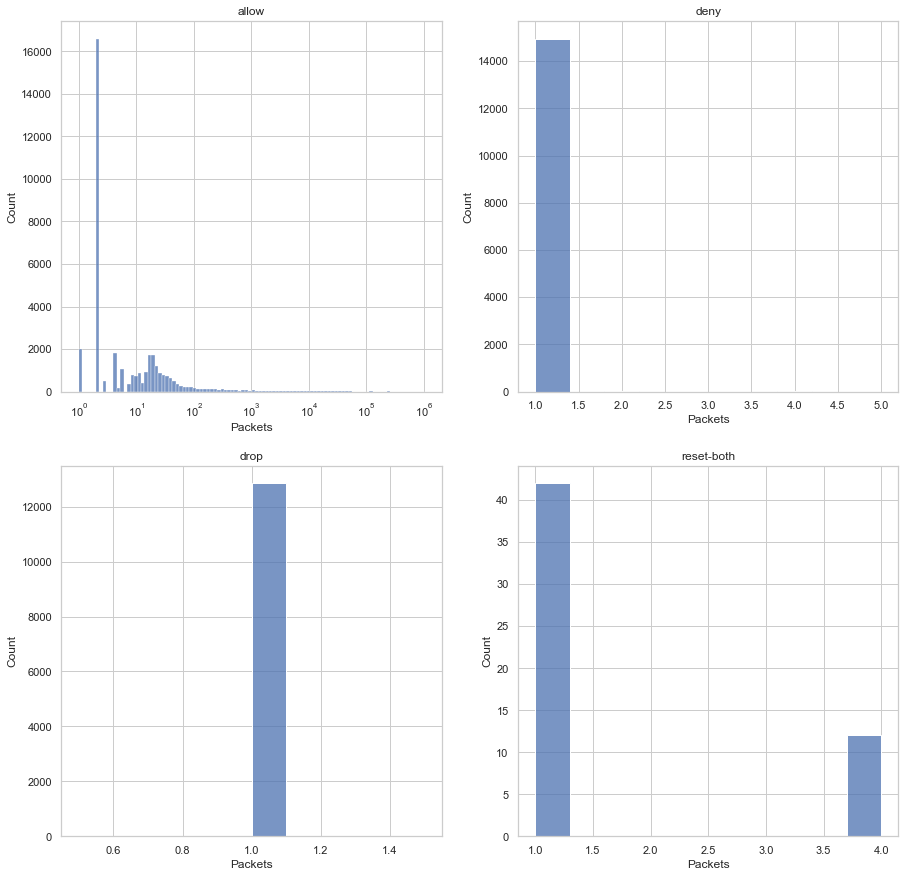

In [16]:
#Setup subplot
fig, ((axes1,axes2),(axes3,axes4)) = plt.subplots(2, 2, figsize=(15, 15))

sns.histplot(data=df.loc[df['Action']=='allow',(['Action','Packets'])], 
             x='Packets',
             bins=100,
             log_scale=True,
             ax=axes1).set(title='allow')

sns.histplot(data=df.loc[df['Action']=='deny',(['Action','Packets'])], 
             x='Packets',
             bins=10, 
             ax=axes2).set(title='deny')

sns.histplot(data=df.loc[df['Action']=='drop',(['Action','Packets'])], 
             x='Packets',
             bins=10, 
             ax=axes3).set(title='drop')

sns.histplot(data=df.loc[df['Action']=='reset-both',(['Packets'])], 
             x='Packets',
             bins=10, 
             ax=axes4).set(title='reset-both')

2.2 Exploratory of Numerical Features

In [17]:
features_num = ['Bytes', 'Bytes Sent', 'Bytes Received',
                'Packets', 'Elapsed Time (sec)', 
                'pkts_sent', 'pkts_received']

In [18]:
# define log trafo for numerical features
def num_trafo(x):
    return np.log10(1+x)

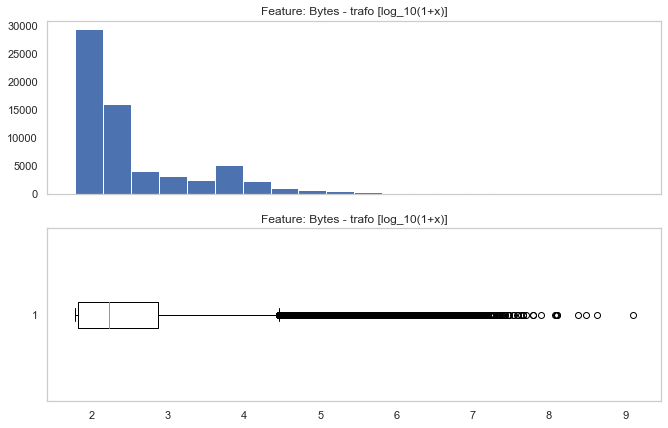

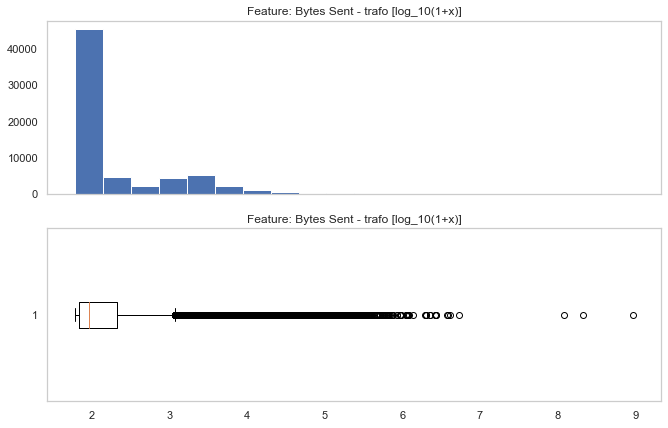

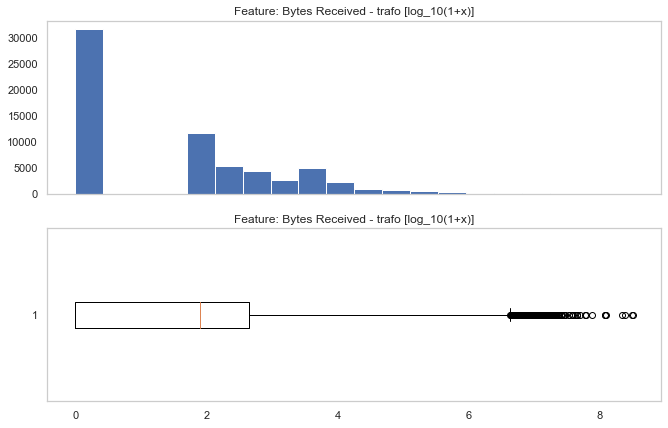

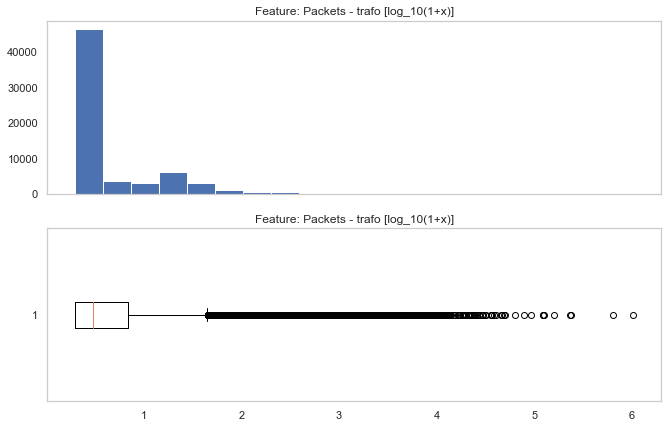

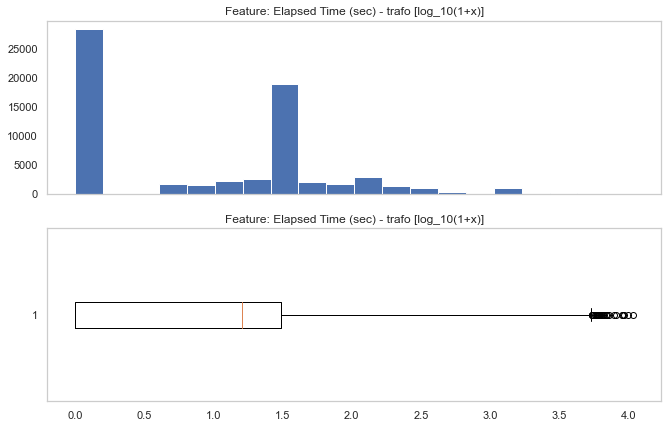

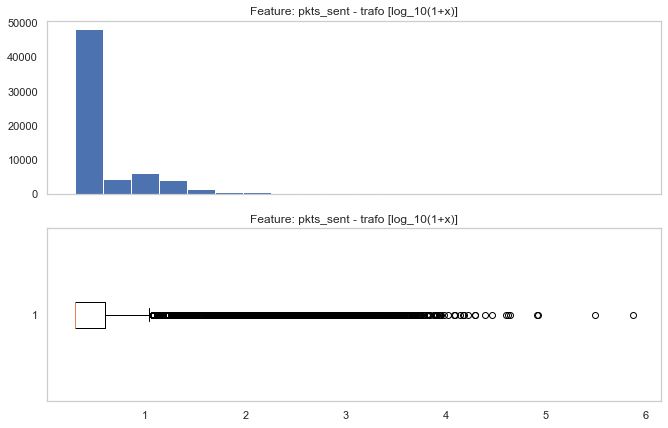

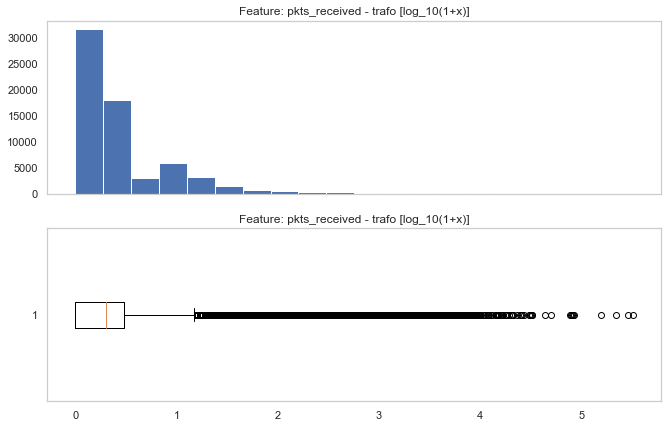

In [19]:
# plot distribution of numerical features
for f in features_num:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11,7), sharex=True)
    ax1.hist(num_trafo(df[f]), bins=20)
    ax1.grid()
    ax1.set_title('Feature: ' + f + ' - trafo [log_10(1+x)]')
    ax2.boxplot(num_trafo(df[f]), vert=False)
    ax2.grid()   
    ax2.set_title('Feature: ' + f + ' - trafo [log_10(1+x)]')
    plt.show()

2.3 Exploratory of Categorical Features

In [20]:
features_cat = ['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port']

Feature: Source Port
58638    840
27005    513
443      273
57470    222
49418    210
6881     177
0        173
50584    116
3478     105
26900    102
Name: Source Port, dtype: int64



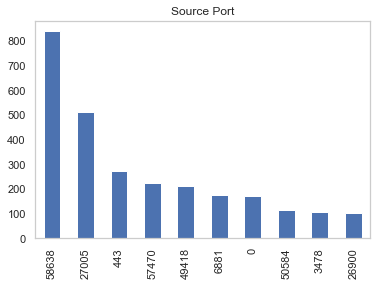

Feature: Destination Port
53       15414
445      12891
443      11684
80        4035
25174     1087
5900       909
37965      826
22114      767
64147      756
50584      717
Name: Destination Port, dtype: int64



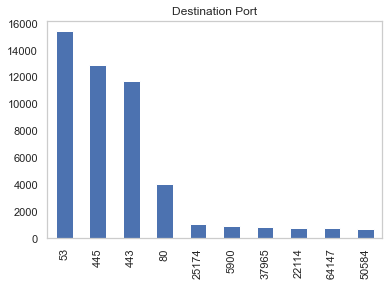

Feature: NAT Source Port
0        28432
48817       83
58638       51
50116       15
7986         5
30399        5
43757        5
57880        5
57596        5
60868        5
Name: NAT Source Port, dtype: int64



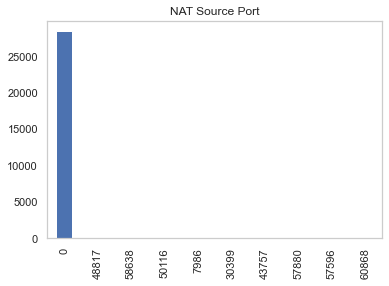

Feature: NAT Destination Port
0        28432
53       15094
443      11678
80        4028
27015      234
27017      160
123        156
3389       156
6881       143
5228       100
Name: NAT Destination Port, dtype: int64



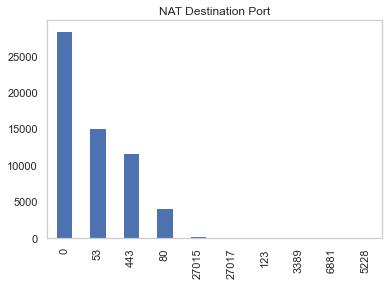

In [21]:
# show only top 10 levels for each feature
for f in features_cat:
    print('Feature:', f)
    print(df[f].value_counts()[0:10])
    print()
    df[f].value_counts()[0:10].plot(kind='bar')
    plt.title(f)
    plt.grid()
    plt.show()

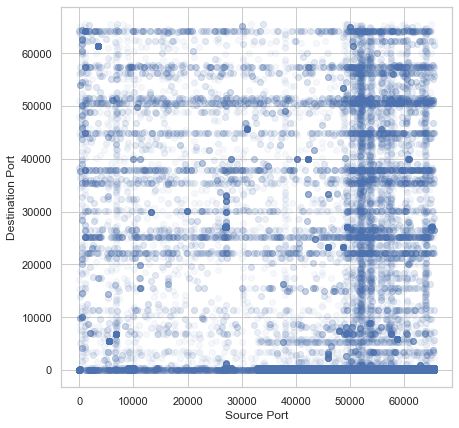

In [22]:
# Source/Destination
plt.figure(figsize=(7,7))
plt.scatter(df['Source Port'], df['Destination Port'], alpha=0.05)
plt.xlabel('Source Port')
plt.ylabel('Destination Port')
plt.show()

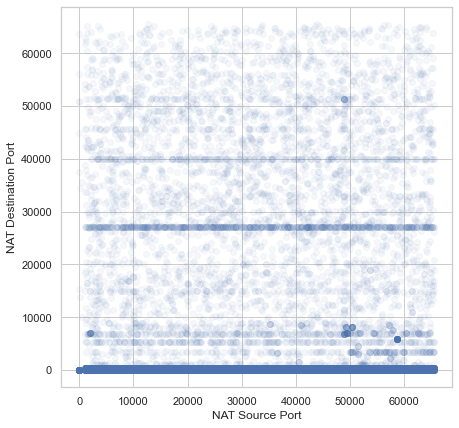

In [23]:
# Source/Destination NAT (Network Address Translation)
plt.figure(figsize=(7,7))
plt.scatter(df['NAT Source Port'], df['NAT Destination Port'], alpha=0.05)
plt.xlabel('NAT Source Port')
plt.ylabel('NAT Destination Port')
plt.show()

Feature:Source Port - Top 10 levels only


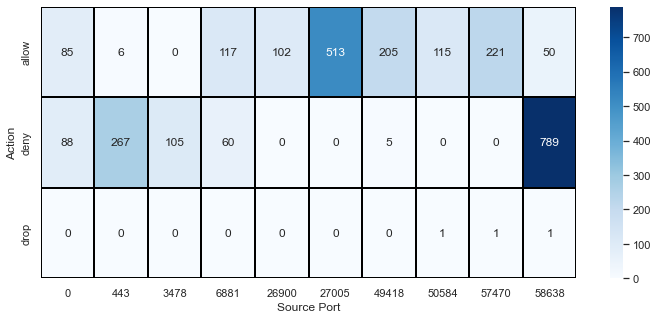

Feature:Destination Port - Top 10 levels only


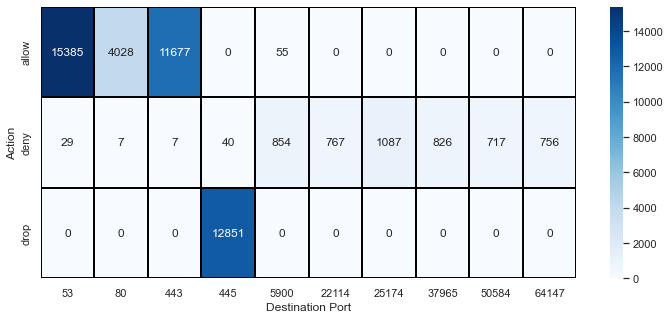

Feature:NAT Source Port - Top 10 levels only


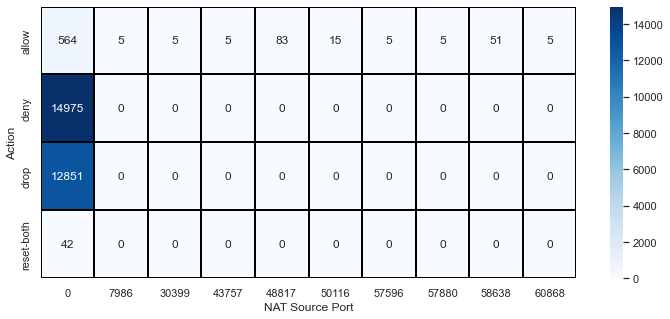

Feature:NAT Destination Port - Top 10 levels only


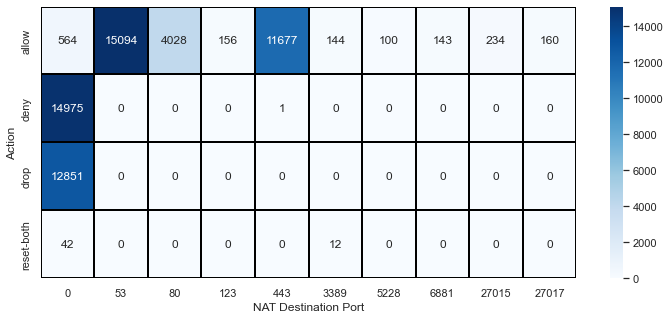

In [24]:
# visualize crosstable target vs feature (using top 10 levels only)
for f in features_cat:
    top10_levels = df[f].value_counts()[0:10].index.to_list()
    df_temp = df[df[f].isin(top10_levels)]
    ctab = pd.crosstab(df_temp.Action, df_temp[f])
    print('Feature:' + f + ' - Top 10 levels only')
    plt.figure(figsize=(12,5))
    sns.heatmap(ctab, annot=True, fmt='d', 
                cmap='Blues',
                linecolor='black',
                linewidths=0.1)
    plt.show()

2.3.1 Source/Destination plots split by target

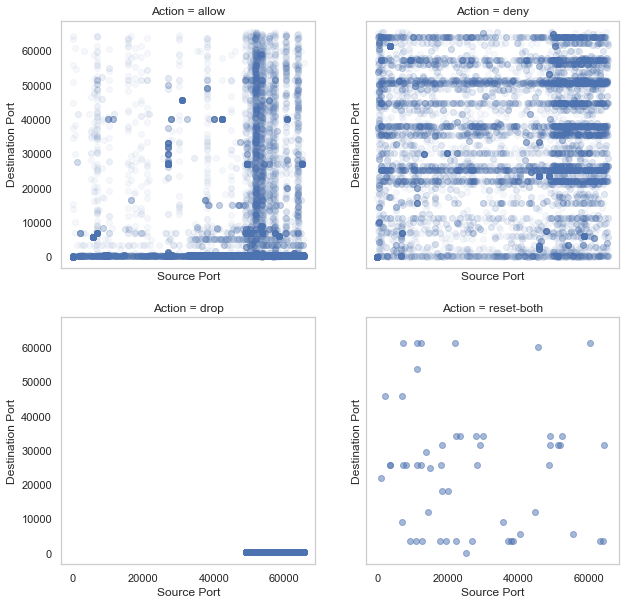

In [25]:
# source/destination plot by Action
xx = 'Source Port'
yy = 'Destination Port'

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10,10))

df_temp = df[df.Action=='allow']
axs[0,0].scatter(df_temp[xx], df_temp[yy], alpha=0.05)
axs[0,0].set_title('Action = allow')
axs[0,0].set_xlabel(xx)
axs[0,0].set_ylabel(yy)
axs[0,0].grid()

df_temp = df[df.Action=='deny']
axs[0,1].scatter(df_temp[xx], df_temp[yy], alpha=0.05)
axs[0,1].set_title('Action = deny')
axs[0,1].set_xlabel(xx)
axs[0,1].set_ylabel(yy)
axs[0,1].grid()

df_temp = df[df.Action=='drop']
axs[1,0].scatter(df_temp[xx], df_temp[yy], alpha=0.5)
axs[1,0].set_title('Action = drop')
axs[1,0].set_xlabel(xx)
axs[1,0].set_ylabel(yy)
axs[1,0].grid()

df_temp = df[df.Action=='reset-both']
axs[1,1].scatter(df_temp[xx], df_temp[yy], alpha=0.5)
axs[1,1].set_title('Action = reset-both')
axs[1,1].set_xlabel(xx)
axs[1,1].set_ylabel(yy)
axs[1,1].grid()

plt.show()

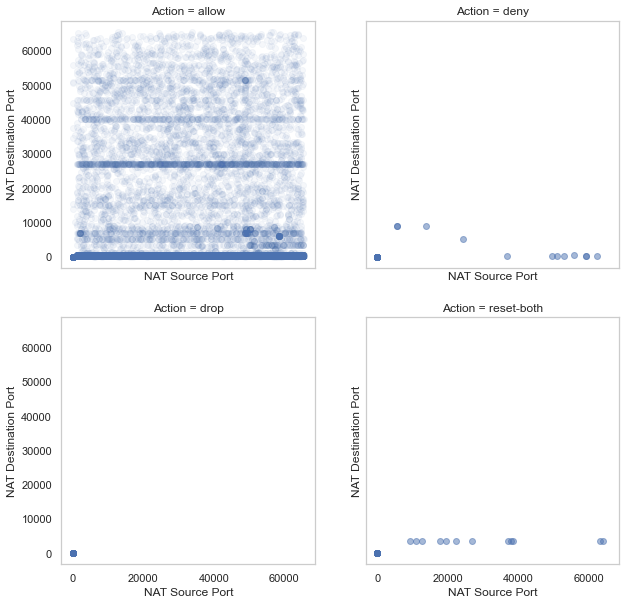

In [26]:
# source/destination plot by Action - NAT (Network Address Translation) version
xx = 'NAT Source Port'
yy = 'NAT Destination Port'

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10,10))

df_temp = df[df.Action=='allow']
axs[0,0].scatter(df_temp[xx], df_temp[yy], alpha=0.05)
axs[0,0].set_title('Action = allow')
axs[0,0].set_xlabel(xx)
axs[0,0].set_ylabel(yy)
axs[0,0].grid()

df_temp = df[df.Action=='deny']
axs[0,1].scatter(df_temp[xx], df_temp[yy], alpha=0.5)
axs[0,1].set_title('Action = deny')
axs[0,1].set_xlabel(xx)
axs[0,1].set_ylabel(yy)
axs[0,1].grid()

df_temp = df[df.Action=='drop']
axs[1,0].scatter(df_temp[xx], df_temp[yy], alpha=0.5)
axs[1,0].set_title('Action = drop')
axs[1,0].set_xlabel(xx)
axs[1,0].set_ylabel(yy)
axs[1,0].grid()

df_temp = df[df.Action=='reset-both']
axs[1,1].scatter(df_temp[xx], df_temp[yy], alpha=0.5)
axs[1,1].set_title('Action = reset-both')
axs[1,1].set_xlabel(xx)
axs[1,1].set_ylabel(yy)
axs[1,1].grid()

plt.show()